<a href="https://colab.research.google.com/github/IqmanS/NLP-Assignments/blob/main/NLP_in_Python_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Iqman Singh Bhatia (102103189)

# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
!wget https://github.com/IqmanS/NLP-Assignments/raw/main/data/dtm.pkl -q
!wget https://github.com/IqmanS/NLP-Assignments/raw/main/data/cv.pkl -q
!wget https://github.com/IqmanS/NLP-Assignments/raw/main/data/corpus.pkl -q
!wget https://github.com/IqmanS/NLP-Assignments/raw/main/data/data_clean.pkl -q

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_pickle('corpus.pkl')
full_name = data["full_name"]
data = pd.read_pickle('data_clean.pkl')
data["full_name"] = full_name
data

,transcript,full_name
ali,ali wong baby cobra transcript scraps from...,Ali Wong
amy,amy schumer emergency contact transcript s...,Amy Schumer
anthony,anthony jeselnik thoughts and prayers full ...,Anthony Jeselnik
beth,beth stelling girl daddy transcript scraps...,Beth Stelling
bill,bill burr im sorry you feel that way full t...,Bill Burr
burr,bill burr paper tiger transcript scraps fr...,Bill Burr
dave,dave chappelle the age of spin transcript ...,Dave Chappelle
dylan,dylan moran off the hook transcript scraps...,Dylan Moran
hasan,hasan minhaj at white house correspondents d...,Hasan Minhaj
jim,jim jefferies bare full transcript scraps ...,Jim Jefferies


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,ali wong baby cobra transcript scraps from...,Ali Wong,0.070026,0.480836
amy,amy schumer emergency contact transcript s...,Amy Schumer,0.120283,0.529101
anthony,anthony jeselnik thoughts and prayers full ...,Anthony Jeselnik,0.056639,0.558729
beth,beth stelling girl daddy transcript scraps...,Beth Stelling,0.131325,0.472755
bill,bill burr im sorry you feel that way full t...,Bill Burr,0.010796,0.544443
burr,bill burr paper tiger transcript scraps fr...,Bill Burr,0.089111,0.474380
dave,dave chappelle the age of spin transcript ...,Dave Chappelle,0.003400,0.513064
dylan,dylan moran off the hook transcript scraps...,Dylan Moran,0.080298,0.529779
hasan,hasan minhaj at white house correspondents d...,Hasan Minhaj,0.127954,0.493039
jim,jim jefferies bare full transcript scraps ...,Jim Jefferies,0.042518,0.535360


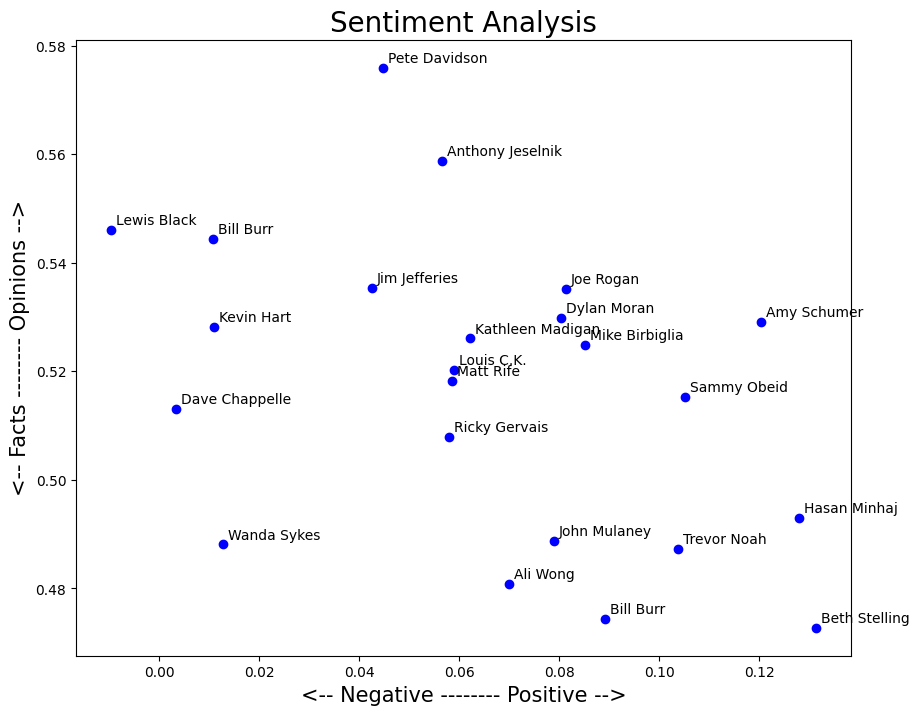

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    # plt.xlim(-.01, .12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,ali wong baby cobra transcript scraps from...,Ali Wong,0.070026,0.480836
amy,amy schumer emergency contact transcript s...,Amy Schumer,0.120283,0.529101
anthony,anthony jeselnik thoughts and prayers full ...,Anthony Jeselnik,0.056639,0.558729
beth,beth stelling girl daddy transcript scraps...,Beth Stelling,0.131325,0.472755
bill,bill burr im sorry you feel that way full t...,Bill Burr,0.010796,0.544443
burr,bill burr paper tiger transcript scraps fr...,Bill Burr,0.089111,0.474380
dave,dave chappelle the age of spin transcript ...,Dave Chappelle,0.003400,0.513064
dylan,dylan moran off the hook transcript scraps...,Dylan Moran,0.080298,0.529779
hasan,hasan minhaj at white house correspondents d...,Hasan Minhaj,0.127954,0.493039
jim,jim jefferies bare full transcript scraps ...,Jim Jefferies,0.042518,0.535360


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[[' ali wong baby cobra   transcript  scraps from the loft   skip to content moviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  menumoviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks search search moviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks  menumoviesmovie reviewsmovie transcriptsstanley kubricktv seriestv show transcriptscomedystandup comedy transcriptsgeorge carlindave chappelleinterviewsplayboy interviewsmusichistorybooks search searchcomedy ali wong baby cobra   transcript september  ali wongs stand up special delves into her sexual adventures hoarding the rocky road to pregnancy a

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

23

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.13068504594820385,
  0.018037464985994397,
  0.1028939909297052,
  0.0813985661604709,
  -0.029660421545667448,
  0.11223901966089467,
  0.04185551948051948,
  0.10265717398070336,
  0.03434946656258132,
  0.11393781256794952],
 [0.2890387063916475,
  0.20657218077430844,
  0.008981684981684973,
  0.07945816584209439,
  0.07918050770091586,
  0.0686648478835979,
  0.056942355889724315,
  0.14168482647296204,
  0.16283304988662128,
  0.18956349206349202],
 [0.19071556221556216,
  -0.03304520155169506,
  -0.06796737213403882,
  0.013250561167227852,
  0.13769785769785772,
  0.09077906162464984,
  0.08467032967032967,
  -0.07509479717813053,
  0.0497701671088768,
  0.22678801694759143],
 [0.2158613445378151,
  0.1742085953878407,
  0.09336980920314256,
  0.1443032661782662,
  0.07114598364598365,
  0.08318910256410258,
  0.13845628415300545,
  0.07245593186769657,
  0.17854166666666665,
  0.19088955026455023],
 [-0.003271628242558479,
  -0.01993864051386177,
  -0.00721689685975401,
  

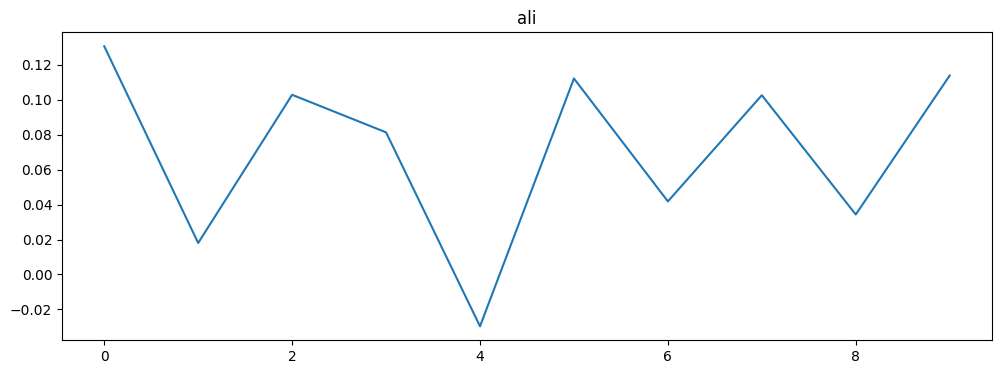

In [ ]:
# Show the plot for one comedian
plt.figure(figsize=(12,4))
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

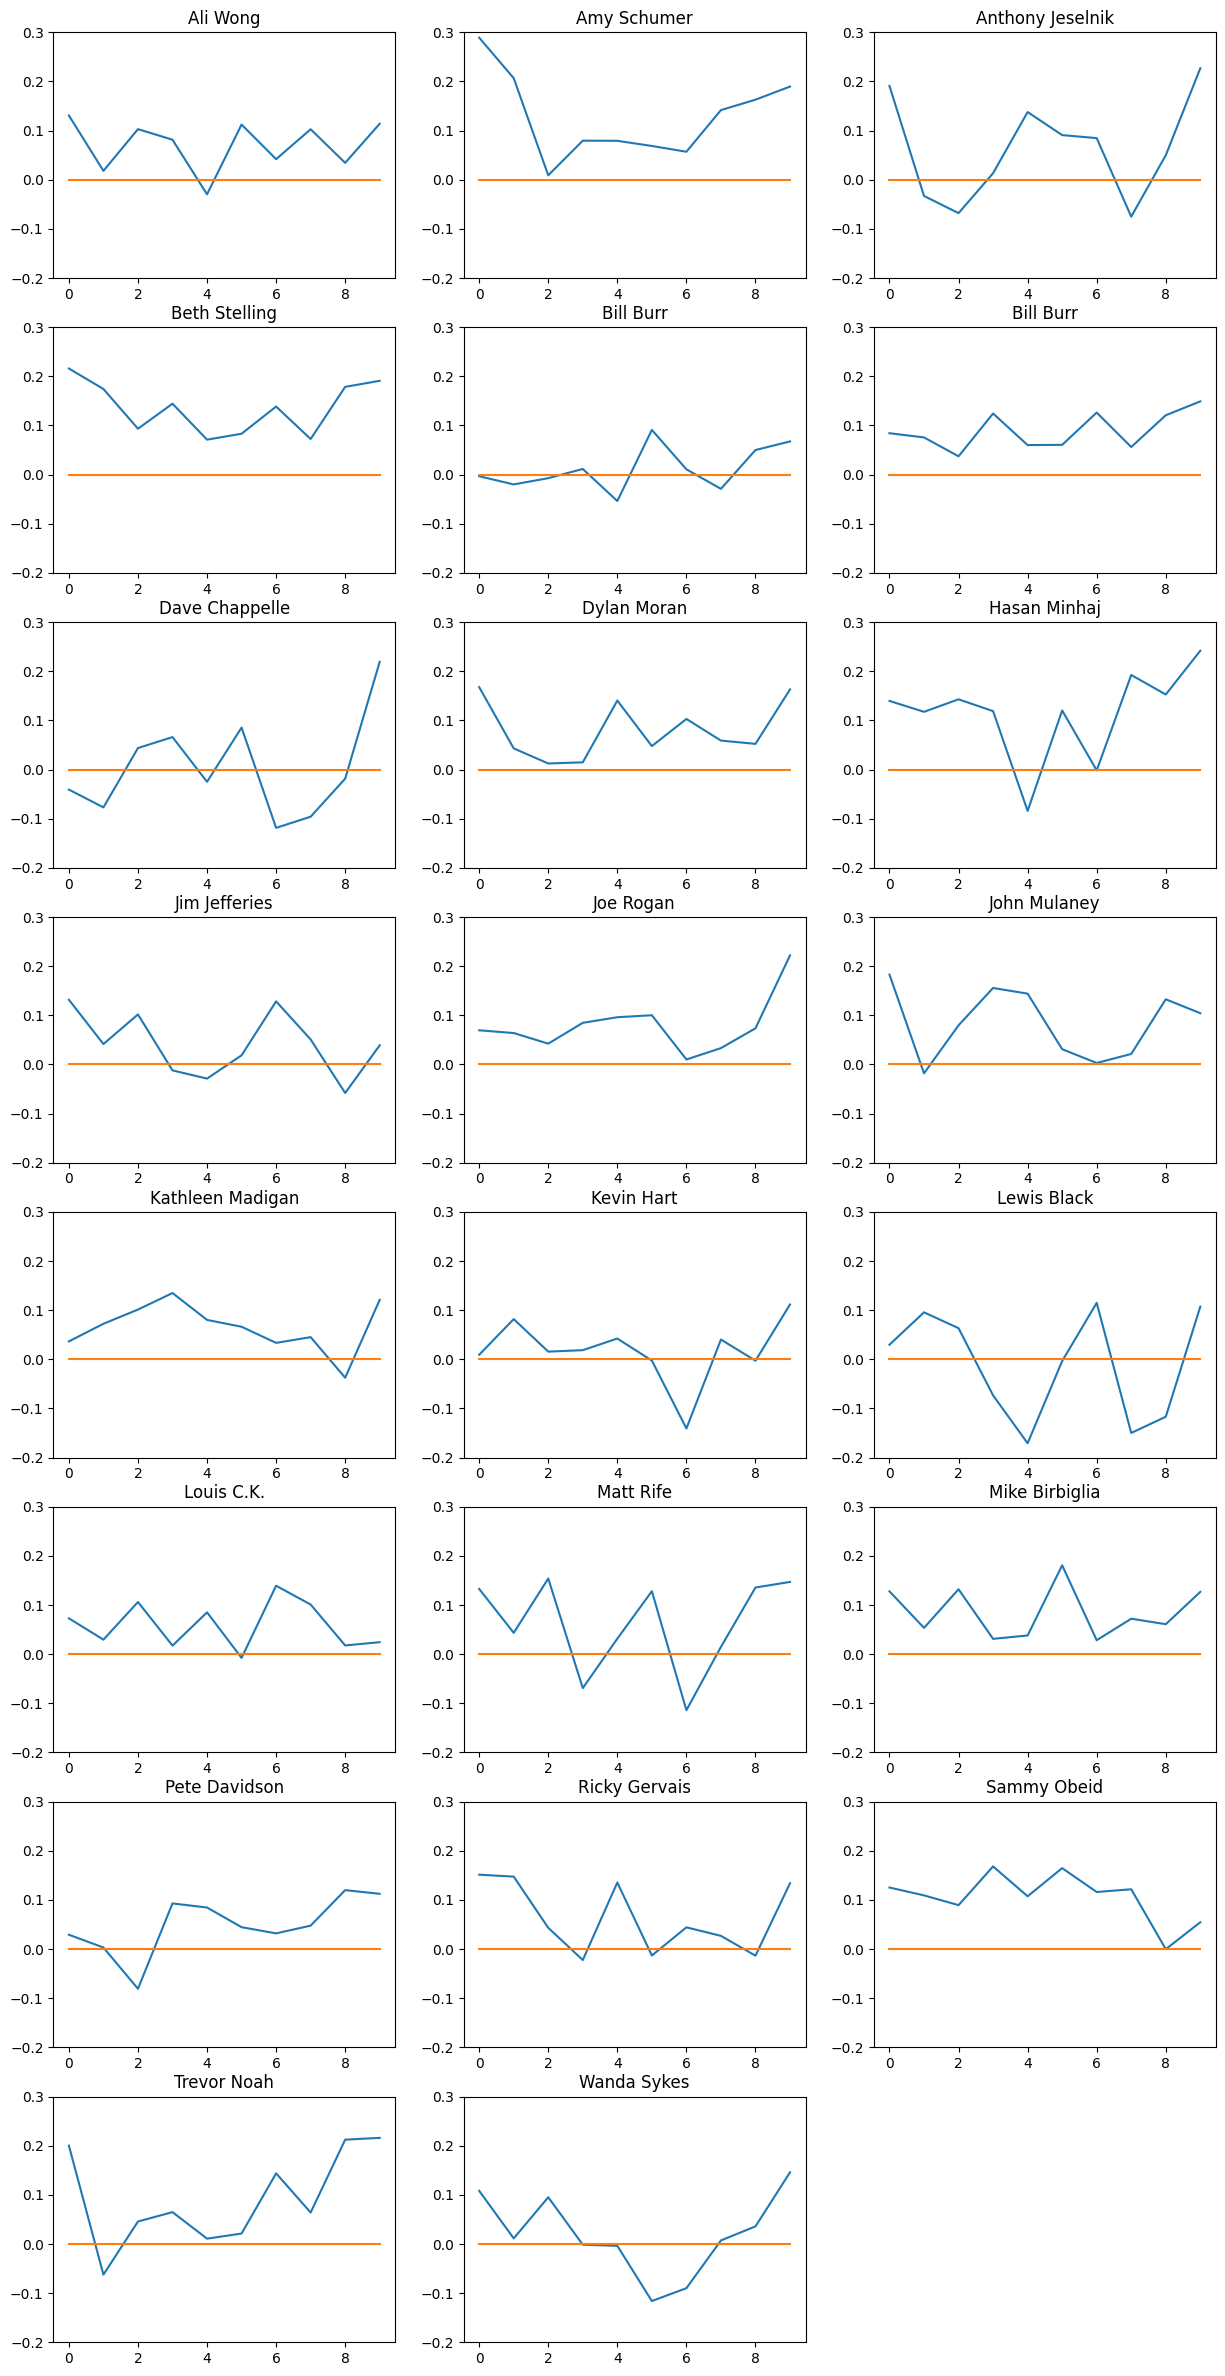

In [ ]:
# Show the plot for all comedians
plt.figure(figsize=(18,30))
for index, comedian in enumerate(data.index):
    plt.subplot(8, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [ ]:
def getPolarityClass(polarity):
    if polarity<-0.5:
        return "Highly Negetive"
    elif polarity<-0.05:
        return "Mostly Negetive"
    elif polarity<0.05:
        return "Neutral"
    elif polarity<0.5:
        return "Mostly Positve"
    return "Highly Positive"

def getSubjectivityClass(subjectivity):
    if subjectivity<0.25:
        return "Highly Factual"
    elif subjectivity<0.5:
        return "Mostly Factual"
    elif subjectivity<0.75:
        return "Mostly Opinionated"
    return "Highly Opinionated"

data["polarity_class"] = data["polarity"].apply(getPolarityClass)
data["subjectivity_class"] = data["subjectivity"].apply(getSubjectivityClass)

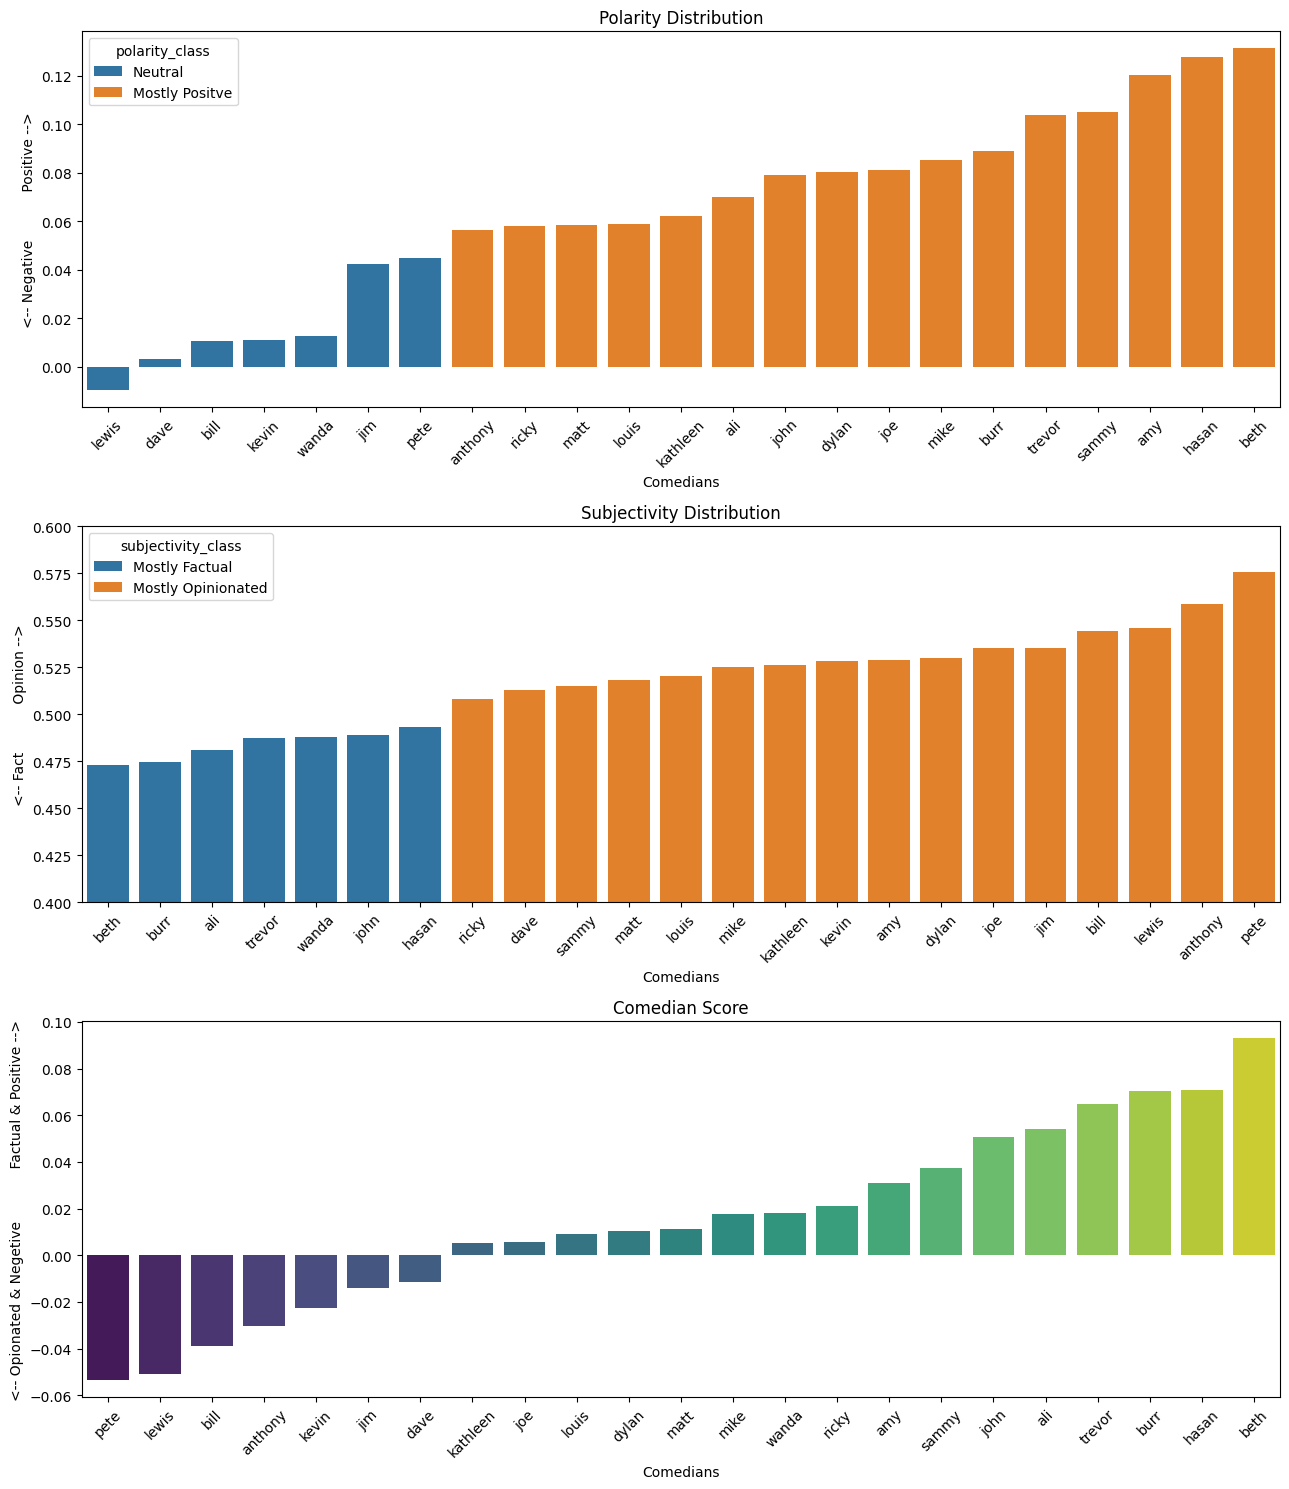

In [ ]:
# Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
# Divide comedians in 5 classes: Highly Negetive, Mostly Negetive, Neutral, Mostly Positive, Highly

plt.subplots(3,1,figsize=(13,15));

data.sort_values("polarity",inplace=True)
plt.subplot(3,1,1)
plt.title("Polarity Distribution")
sns.barplot(data,y="polarity",x=data.index,hue="polarity_class")
plt.xlabel("Comedians")
plt.ylabel('<-- Negative           Positive -->')
plt.xticks(rotation = 45);

# Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
# Divide comedians in 4 classes: Highly Factual, Mostly Factual, Mostly Opinionated, Highly Opinionated

data.sort_values("subjectivity",inplace=True)
plt.subplot(3,1,2)
plt.title("Subjectivity Distribution")
sns.barplot(data,y="subjectivity",x=data.index,hue="subjectivity_class")
plt.xlabel("Comedians")
plt.ylabel('<-- Fact           Opinion -->')
plt.xticks(rotation = 45);
plt.ylim(0.4,0.6);

data["comedian_score"] = (data["polarity"]+1)/2 - data["subjectivity"]

data.sort_values("comedian_score",inplace=True)
plt.subplot(3,1,3)
plt.title("Comedian Score")
sns.barplot(data,y="comedian_score",x=data.index,palette="viridis");
plt.xlabel("Comedians")
plt.ylabel('<-- Opionated & Negetive            Factual & Positive -->')
plt.xticks(rotation = 45);
plt.tight_layout()
plt.show()

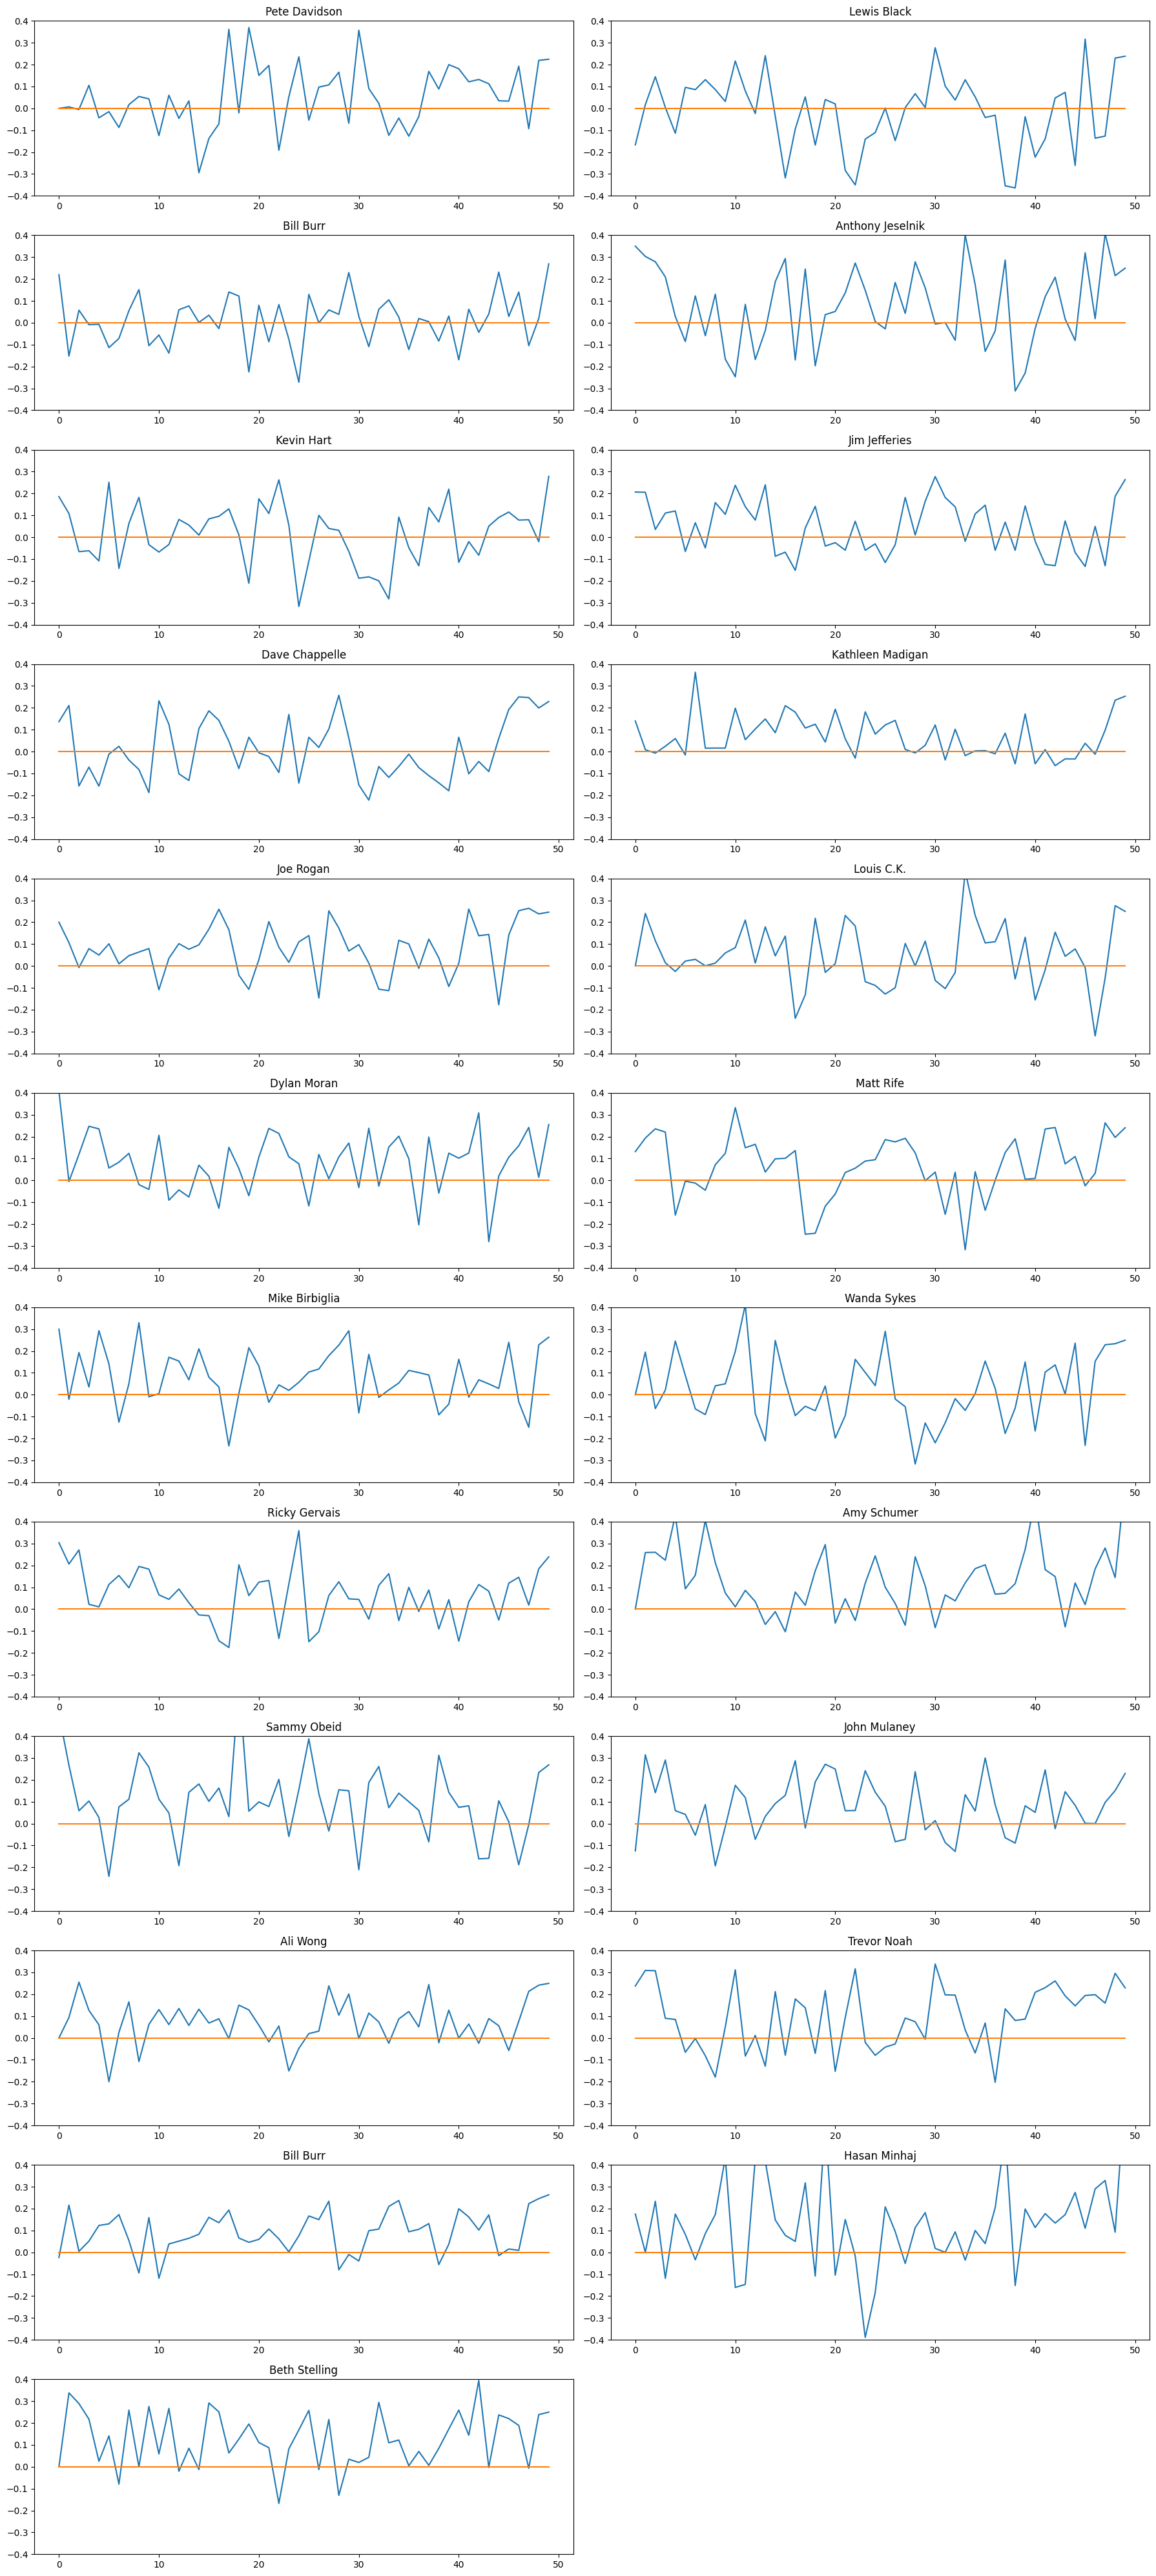

In [ ]:
# 50 SPLITS

splits = []
for trans in data.transcript:
    split = split_text(text=trans,n=50)
    splits.append(split)

polarity_transcript = []
for lp in splits:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

# Show the plot for all comedians
plt.figure(figsize=(18,40))
for index, comedian in enumerate(data.index):
    plt.subplot(12, 2, index+1)
    # plt.plot(polarity_transcript[index])
    sns.lineplot(polarity_transcript[index],palette="flare")
    plt.plot(np.arange(0,50), np.zeros(50))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.4, ymax=.4)
plt.tight_layout()
plt.show();